In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from kaggle_data_utils import build_dataset
from classifier_utils import *

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns

In [19]:
trainX, trainY = build_dataset(relative_path="..", normalize=True)

print(trainX.shape, trainY.shape)

(1013, 9) (1013,)


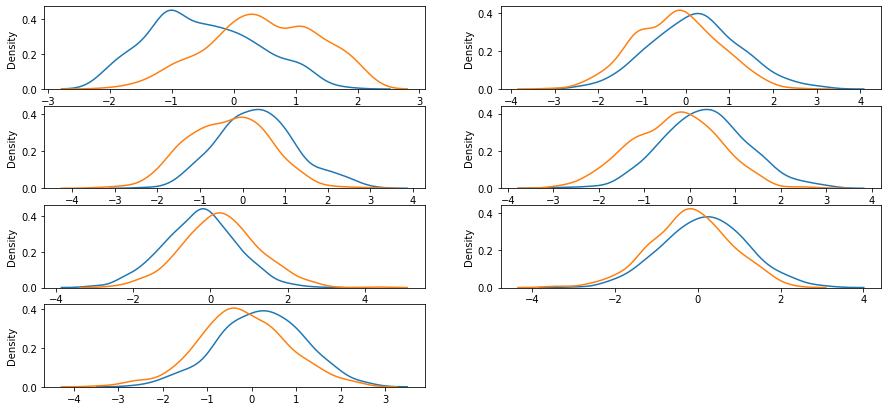

In [4]:
plt.figure(figsize=(15, 7))
for i in range(7):
    plt.subplot(4, 2, i + 1)
    sns.distplot(trainX[trainY == 1, i], hist=False, kde=True)
    sns.distplot(trainX[trainY == -1, i], hist=False, kde=True)
plt.show()

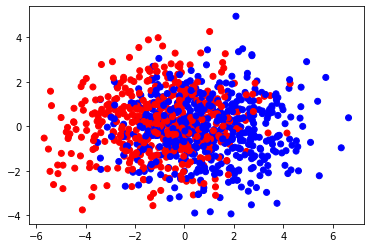

In [5]:
pca = PCA(n_components = 2)
projected_X = pca.fit_transform(trainX)
colors = ['r' if y == 1 else 'b' for y in trainY]
plt.scatter(projected_X[:,0], projected_X[:, 1], c = colors)

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [7]:
lda_clf = LDA(priors=[0.5, 0.5])
check_classifier(lda_clf, trainX, trainY)

Cross-Validating model
[0.74509804 0.69607843 0.70588235 0.72277228 0.74257426 0.64356436
 0.68316832 0.72277228 0.73267327 0.71287129]
Accuracy: 0.71 (+/- 0.03)




In [ ]:
lda_clf = LDA(priors=[0.5, 0.5], n_components=1)
projected_X = lda_clf.fit_transform(trainX, trainY)

colors = ['r' if y == 1 else 'b' for y in trainY]
plt.figure(figsize=(15, 7))

sns.distplot(projected_X[trainY == 1], hist=False, kde=True)
sns.distplot(projected_X[trainY == -1], hist=False, kde=True)
plt.show()

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
params= {'kernel':('rbf', 'linear'), 'C':[1, 10, 100, 1000, 10000], 'gamma': [0.01, 0.1, 1, 10, 100]}
svm = SVC()
grid_search_params(svm, trainX, trainY, params)

In [9]:
svm = SVC(C=1000, gamma = 0.01, kernel = 'linear')
check_classifier(svm, trainX, trainY)

Cross-Validating model
[0.74509804 0.70588235 0.70588235 0.73267327 0.76237624 0.66336634
 0.69306931 0.71287129 0.73267327 0.73267327]
Accuracy: 0.72 (+/- 0.03)




In [10]:
save_classifier(svm, trainX, trainY, name="svm.pkl")

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_params= {'max_depth': [None, 2, 5], 'max_samples': [100, 500, None]}
rf_clf = RandomForestClassifier()
grid_search_params(rf_clf, trainX, trainY, rf_params)

In [12]:
rf_clf = RandomForestClassifier(max_depth=2, max_samples=500)
check_classifier(rf_clf, trainX, trainY)

Cross-Validating model
[0.7745098  0.69607843 0.64705882 0.69306931 0.73267327 0.65346535
 0.7029703  0.72277228 0.69306931 0.7029703 ]
Accuracy: 0.70 (+/- 0.03)




# No Seed Models

In [13]:
trainX_noseed = trainX[:, 1:]

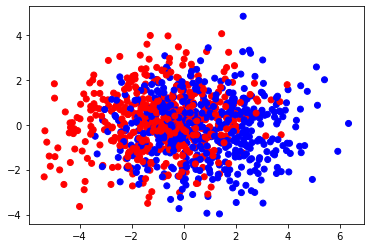

In [14]:
pca = PCA(n_components = 2)
projected_X = pca.fit_transform(trainX_noseed)
colors = ['r' if y == 1 else 'b' for y in trainY]
plt.scatter(projected_X[:,0], projected_X[:, 1], c = colors)

In [ ]:
params= {'kernel':('rbf', 'linear'), 'C':[1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
svm = SVC()
grid_search_params(svm, trainX_noseed, trainY, params)

In [15]:
svm_clf = SVC(C=10, gamma=0.001, kernel='linear')
check_classifier(svm_clf, trainX_noseed, trainY)

Cross-Validating model
[0.75490196 0.69607843 0.62745098 0.66336634 0.65346535 0.63366337
 0.65346535 0.74257426 0.58415842 0.72277228]
Accuracy: 0.67 (+/- 0.05)




In [16]:
save_classifier(svm, trainX_noseed, trainY, name="svm-noseed.pkl")